In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

C:\Users\woosung\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [14]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
X = cleanmeta[['budget','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']].values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [15]:
len(X)

5381

In [16]:
#2 is near median of y
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 1 #success
    else:
        y[i] = 0 #failure


In [17]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]



In [18]:
len(y_test)

881

In [19]:
"""
Penalty param
"""
lr = LogisticRegression(random_state=0, solver='liblinear', penalty= 'l2')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
p= cross_val_score(lr, X_test, y_test, cv=10, scoring='precision').mean()
r= cross_val_score(lr, X_test, y_test, cv=10, scoring='recall').mean()
f1= cross_val_score(lr, X_test, y_test, cv=10, scoring='f1').mean()

#r =recall_score(y_test, y_pred)  
#p =precision_score(y_test, y_pred)  
#f1 =f1_score(y_test, y_pred)  

In [20]:
lr_l1 = LogisticRegression(random_state=0, solver='liblinear', penalty= 'l1')
lr_l1.fit(X_train,y_train)
y_pred_l1 = lr_l1.predict(X_test)
scores_l1 = cross_val_score(lr_l1, X_test, y_test, cv=10).mean()
p_l1= cross_val_score(lr_l1, X_test, y_test, cv=10, scoring='precision').mean()
r_l1= cross_val_score(lr_l1, X_test, y_test, cv=10, scoring='recall').mean()
f1_l1= cross_val_score(lr_l1, X_test, y_test, cv=10, scoring='f1').mean()

#rl1 = recall_score(y_test, y_pred_l1)  
#pl1 = precision_score(y_test, y_pred_l1)  
#f1l1 = f1_score(y_test, y_pred_l1) 

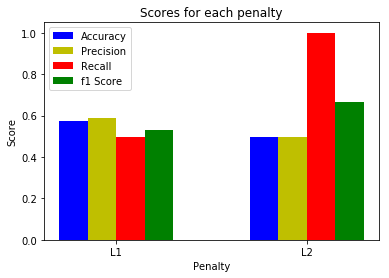

In [21]:
N = 2

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_l1,scores]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_l1,p]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_l1,r]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_l1,f1]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Score')
ax.set_xlabel("Penalty")
ax.set_title('Scores for each penalty')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('L1', 'L2'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'))

plt.show()

L1 is better than L2 with our data

In [22]:
"""
Solvers
"""
# lr = LogisticRegression(random_state=0,solver='liblinear') #default
# lr.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# scores = cross_val_score(lrl1, X_test, y_test, cv=10).mean()
# r = recall_score(y_test, y_pred_l1)  
# p = precision_score(y_test, y_pred_l1)  
# f1 = f1_score(y_test, y_pred_l1) 

'\nSolvers\n'

In [23]:
lr_ll = LogisticRegression(random_state=0,solver='liblinear', penalty= 'l1')
lr_ll.fit(X_train,y_train)
y_pred_ll = lr_ll.predict(X_test)
scores_ll = cross_val_score(lr_ll, X_test, y_test, cv=10).mean()
p_ll= cross_val_score(lr_ll, X_test, y_test, cv=10, scoring='precision').mean()
r_ll= cross_val_score(lr_ll, X_test, y_test, cv=10, scoring='recall').mean()
f1_ll= cross_val_score(lr_ll, X_test, y_test, cv=10, scoring='f1').mean()

In [24]:
lr_saga = LogisticRegression(random_state=0,solver='saga',penalty ='l1')
lr_saga.fit(X_train,y_train)
y_pred_saga = lr_saga.predict(X_test)
scores_saga = cross_val_score(lr_saga, X_test, y_test, cv=10).mean()
p_saga= cross_val_score(lr_saga, X_test, y_test, cv=10, scoring='precision').mean()
r_saga= cross_val_score(lr_saga, X_test, y_test, cv=10, scoring='recall').mean()
f1_saga= cross_val_score(lr_saga, X_test, y_test, cv=10, scoring='f1').mean()

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


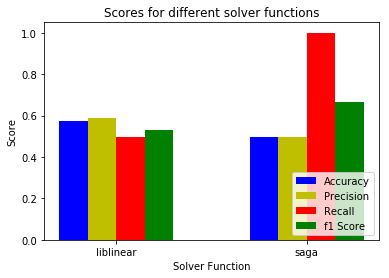

In [25]:
N = 2

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_ll,scores_saga]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_ll,p_saga]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_ll,r_saga]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_ll,f1_saga]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')


ax.set_ylabel('Score')
ax.set_xlabel('Solver Function')
ax.set_title('Scores for different solver functions')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('liblinear','saga'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

Only liblinear and saga solver works with L1 penalty.
liblinear is the best performing one 0.5731387881136041

In [27]:
#multi_class : str, {‘ovr’, ‘multinomial’, ‘auto’}, default: ‘ovr’ 
"""
only ovr works for multi_class.  Solver liblinear does not support a multinomial backend.
"""

'\nonly ovr works for multi_class.  Solver liblinear does not support a multinomial backend.\n'

no difference between 2, will go with multinomial because "auto" multi class multinomial first.

In [28]:
"""
Tolerance 
"""

'\nTolerance \n'

In [29]:
lr = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1') #default 1e-4
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
p= cross_val_score(lr, X_test, y_test, cv=10, scoring='precision').mean()
r= cross_val_score(lr, X_test, y_test, cv=10, scoring='recall').mean()
f1= cross_val_score(lr, X_test, y_test, cv=10, scoring='f1').mean()

In [30]:
lr_t2 = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1', tol= 1e-2) 
lr_t2.fit(X_train,y_train) 
y_pred_t2 = lr_t2.predict(X_test)
scores_t2 = cross_val_score(lr_t2, X_test, y_test, cv=10).mean()
p_t2 = cross_val_score(lr_t2 , X_test, y_test, cv=10, scoring='precision').mean()
r_t2 = cross_val_score(lr_t2 , X_test, y_test, cv=10, scoring='recall').mean()
f1_t2 = cross_val_score(lr_t2 , X_test, y_test, cv=10, scoring='f1').mean()

In [31]:
lr_t3 = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1', tol= 1e-3) 
lr_t3.fit(X_train,y_train) 
y_pred_t3 = lr_t3.predict(X_test)
scores_t3 = cross_val_score(lr_t3, X_test, y_test, cv=10).mean()
p_t3 = cross_val_score(lr_t3 , X_test, y_test, cv=10, scoring='precision').mean()
r_t3 = cross_val_score(lr_t3 , X_test, y_test, cv=10, scoring='recall').mean()
f1_t3 = cross_val_score(lr_t3 , X_test, y_test, cv=10, scoring='f1').mean()

In [32]:
lr_t5 = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1', tol= 1e-5) #default 1e-4
lr_t5.fit(X_train,y_train) 
y_pred_t5 = lr_t5.predict(X_test)
scores_t5 = cross_val_score(lr_t5, X_test, y_test, cv=10).mean()
p_t5 = cross_val_score(lr_t5 , X_test, y_test, cv=10, scoring='precision').mean()
r_t5 = cross_val_score(lr_t5 , X_test, y_test, cv=10, scoring='recall').mean()
f1_t5 = cross_val_score(lr_t5 , X_test, y_test, cv=10, scoring='f1').mean()
#added max_iter to make the model converges to end

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

In [33]:
lr_t6 = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1', tol= 1e-6) #default 1e-4
lr_t6.fit(X_train,y_train) 
y_pred_t6 = lr_t6.predict(X_test)
scores_t6 = cross_val_score(lr_t6, X_test, y_test, cv=10).mean()
p_t6 = cross_val_score(lr_t6 , X_test, y_test, cv=10, scoring='precision').mean()
r_t6 = cross_val_score(lr_t6 , X_test, y_test, cv=10, scoring='recall').mean()
f1_t6 = cross_val_score(lr_t6 , X_test, y_test, cv=10, scoring='f1').mean()
#added max_iter to make the model converges to end

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

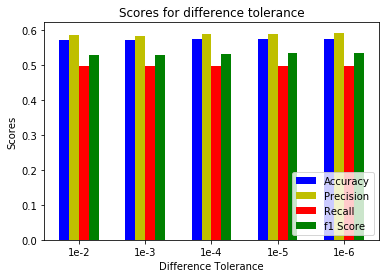

In [34]:
N =5

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_t2,scores_t3,scores,scores_t5,scores_t6]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_t2,p_t3,p,p_t5,p_t6]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_t2,r_t3,r,r_t5,r_t6]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_t2,f1_t3,f1,f1_t5,f1_t6]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_xlabel('Difference Tolerance')
ax.set_title('Scores for difference tolerance')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('1e-2','1e-3','1e-4','1e-5','1e-6'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

In [35]:
accu

[0.5719893628262478,
 0.5708657673206299,
 0.5731387881136041,
 0.5731387881136041,
 0.5754637619903022]

1e-6 performs better

In [36]:
"""
C
"""
lr = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1') #default 1
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
p = cross_val_score(lr , X_test, y_test, cv=10, scoring='precision').mean()
r = cross_val_score(lr , X_test, y_test, cv=10, scoring='recall').mean()
f1 = cross_val_score(lr , X_test, y_test, cv=10, scoring='f1').mean()

In [37]:
lr_c8 = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1', C = 0.8) #default 1
lr_c8.fit(X_train,y_train) 
y_pred_c8 = lr_c8.predict(X_test)
scores_c8 = cross_val_score(lr_c8, X_test, y_test, cv=10).mean()
p_c8 = cross_val_score(lr_c8 , X_test, y_test, cv=10, scoring='precision').mean()
r_c8 = cross_val_score(lr_c8 , X_test, y_test, cv=10, scoring='recall').mean()
f1_c8 = cross_val_score(lr_c8 , X_test, y_test, cv=10, scoring='f1').mean()


In [38]:
lr_c6 = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1',C = 0.6) #default 1
lr_c6.fit(X_train,y_train) 
y_pred_c6 = lr_c6.predict(X_test)
scores_c6 = cross_val_score(lr_c6, X_test, y_test, cv=10).mean()
p_c6 = cross_val_score(lr_c6 , X_test, y_test, cv=10, scoring='precision').mean()
r_c6 = cross_val_score(lr_c6 , X_test, y_test, cv=10, scoring='recall').mean()
f1_c6 = cross_val_score(lr_c6 , X_test, y_test, cv=10, scoring='f1').mean()

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
lr_c4 = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1', C= 0.4) #default 1
lr_c4.fit(X_train,y_train) 
y_pred_c4 = lr_c4.predict(X_test)
scores_c4 = cross_val_score(lr_c4, X_test, y_test, cv=10).mean()
p_c4 = cross_val_score(lr_c4 , X_test, y_test, cv=10, scoring='precision').mean()
r_c4 = cross_val_score(lr_c4 , X_test, y_test, cv=10, scoring='recall').mean()
f1_c4 = cross_val_score(lr_c4 , X_test, y_test, cv=10, scoring='f1').mean()


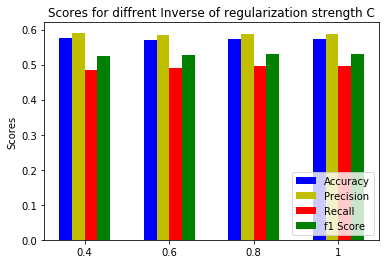

In [40]:
N =4

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [scores_c4,scores_c6,scores_c8,scores]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [p_c4,p_c6,p_c8,p]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [r_c4,r_c6,r_c8,r]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_c4,f1_c6,f1_c8,f1]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Scores for diffrent Inverse of regularization strength C')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('0.4','0.6','0.8','1'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'),loc=4)

plt.show()

In [41]:
accu

[0.5766651403613822,
 0.5709952097495685,
 0.5731384945933572,
 0.5731387881136041]

C = 0.4 has the highest accuracy


In [42]:
"""
Final Model
"""
lr = LogisticRegression(random_state=0,solver ='liblinear',penalty= 'l1',tol =1e-6, C= 0.4) #default 1
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=10).mean()
p = cross_val_score(lr , X_test, y_test, cv=10, scoring='precision').mean()
r = cross_val_score(lr , X_test, y_test, cv=10, scoring='recall').mean()
f1 = cross_val_score(lr , X_test, y_test, cv=10, scoring='f1').mean()

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


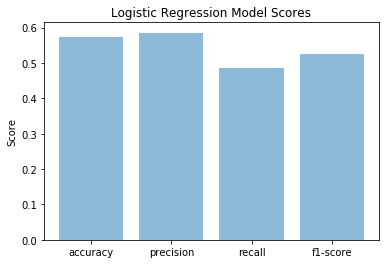

In [43]:
objects = scores,p,r,f1
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.xticks([0, 1, 2, 3], ["accuracy", "precision", "recall", "f1-score"])
plt.ylabel('Score')
plt.title('Logistic Regression Model Scores')
 
plt.show()

In [44]:
objects  #["accuracy", "precision", "recall", "f1-score"])

(0.5743924130886549,
 0.5855546580771469,
 0.4869450317124736,
 0.5254461769514862)

Feature ranking:
1. feature 12 (0.492760)
2. feature 9 (0.489217)
3. feature 15 (0.329895)
4. feature 10 (0.281854)
5. feature 8 (0.185394)
6. feature 14 (0.136384)
7. feature 1 (0.133344)
8. feature 13 (0.101985)
9. feature 11 (0.055696)
10. feature 4 (0.028954)
11. feature 7 (0.011229)
12. feature 2 (0.000855)
13. feature 3 (0.000035)
14. feature 0 (0.000000)
15. feature 6 (0.000000)
16. feature 5 (0.000000)


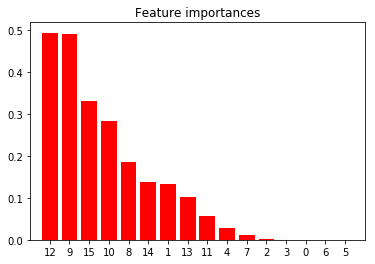

In [45]:
weights = lr.coef_[0]
importances = np.abs(weights)

indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

'budget','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december'

In [46]:
print(weights)
print(sorted(weights)[::-1])
print(np.argsort(weights)[::-1])


[-6.84142157e-09  1.33344454e-01  8.54948635e-04  3.54023420e-05
 -2.89538900e-02  0.00000000e+00  0.00000000e+00 -1.12293366e-02
  1.85394018e-01  4.89216521e-01  2.81853933e-01 -5.56957780e-02
 -4.92760195e-01 -1.01984916e-01  1.36383937e-01  3.29895385e-01]
[0.4892165206334709, 0.32989538454382505, 0.28185393343075993, 0.18539401835216948, 0.13638393668912197, 0.13334445389191768, 0.0008549486348789694, 3.540234204571945e-05, 0.0, 0.0, -6.841421569197016e-09, -0.011229336566447472, -0.0289538899829088, -0.055695778024799344, -0.1019849163814335, -0.4927601945562147]
[ 9 15 10  8 14  1  2  3  6  5  0  7  4 11 13 12]


positive correlation: 12, 13 Positive correlation below 0.0 coef: 11  4  7  0  6  5 

Neg correlation:1 14  8 10 15  9  Neg correlation below 0.0 coef:3  2